In [4]:
import plotly as ply
import pandas as pd
import numpy as np
import math 
import sklearn.preprocessing as MinMaxscaler
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

!pip install mglearn

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [5]:
import pandas as pd
DataFile =  'gt_2011'
data = pd.read_csv('pp_gas_emission/gt_2011.csv')
data.to_pickle(DataFile)

In [6]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


  ## QUESTION 1 : Fit two regression models to predict the amount of Nitrogen oxides (last column). Report accuracy with the default parameters.

In [7]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import train_test_split

X = np.array(data.iloc[:,:8])
y = data.iloc[:,-1:].values

In [8]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.60
Test set score: 0.60


In [9]:
reg = LinearRegression().fit(X,y)
print("R^2 Regression score: {:.2f}".format(reg.score(X,y)))

R^2 Regression score: 0.60


In [10]:
Las = Lasso().fit(X,y)
print("R^2 Lasso score: {:.2f}".format(Las.score(X,y)))
print (f'Used coef: {((Las.coef_)!=0).sum()}')

R^2 Lasso score: 0.57
Used coef: 5


   ## QUESTION 2 : Create a big datafile by fusing all 5 .csv files and fit again two regression models to predict the amount of Nitrogen oxides. 
   ## Do the results change with respect to the previous calculations?

In [11]:
df_2012 = pd.read_csv('pp_gas_emission/gt_2012.csv')
df_2013 = pd.read_csv('pp_gas_emission/gt_2013.csv')
df_2014 = pd.read_csv('pp_gas_emission/gt_2014.csv')
df_2015 = pd.read_csv('pp_gas_emission/gt_2015.csv')

In [12]:
df_full = pd.concat([data,df_2012,df_2013,df_2014,df_2015])
df_full.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [13]:
X_full, y_full = np.array(df_full.iloc[:,:8]), (df_full.iloc[:,-1:]).values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, random_state=42)
reg2 = LinearRegression().fit(X_train,y_train)
print("R^2 Train Regression score: {:.2f}".format(reg2.score(X_train,y_train)))
print("R^2 Test Regression score: {:.2f}".format(reg2.score(X_test,y_test)))

R^2 Train Regression score: 0.52
R^2 Test Regression score: 0.50


In [15]:
las2 = Lasso().fit(X_train, y_train)
print("R^2 Lasso Training set: {:.2f}".format(reg2.score(X_train,y_train)))
print("R^2 Lasso Test set: {:.2f}".format(reg2.score(X_test,y_test)))

R^2 Lasso Training set: 0.52
R^2 Lasso Test set: 0.50


   ## QUESTION 3 : Perform some manual optimization of the parameters (at least 5 different values for each parameter) and plot the new obtained accuracy as a function of the chosen parameter. Plot the coefficient magnitudes for the best model.

In [16]:
lasso = Lasso(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.51
Test set score: 0.50
Number of features used: 6


In [17]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.52
Test set score: 0.50
Number of features used: 8


In [18]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.52
Test set score: 0.50
Number of features used: 8


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR




In [20]:
#Loop

alfa = [0.001,0.01,0.1,1.0,10]
las_score = []
rid_score = []
for i in alfa:
    las3 = Lasso(alfa=i).fit(X_train, y_train)
    rid = Ridge(alfa=i).fit(X_train, y_train)
    las_score.append(las3.score(X_test, y_test))
    rid_score.append(rid3.score(X_test, y_test))

print(rid_score)
print(f'Ridge: {alfa[np.argmax(las_score)]}')
print(f'Lasso: {alfa[np.argmax(rid_score)]}')

TypeError: __init__() got an unexpected keyword argument 'alfa'

In [21]:
names = list(df_full.columns)
X_names = names[:8]
print(names[:8])

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY']


In [22]:

def plot_lasso():
    plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
    plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
    plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
    plt.xticks(range(len(X_names)), X_names, rotation=90)
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.hlines(0, 0, len(X_names))
    plt.ylim(-10, 10)
    plt.legend(ncol=2, loc=(0,1.05))

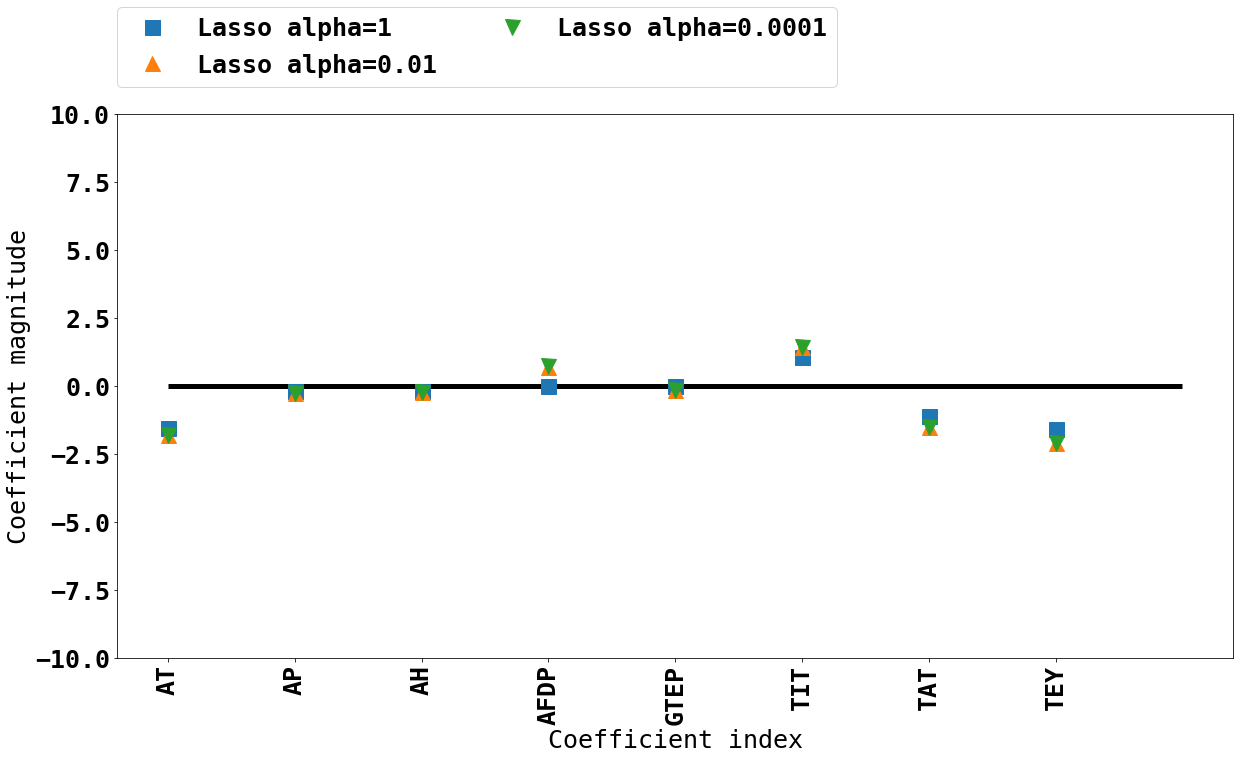

In [23]:
plot_lasso()

In [24]:
ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.52
Test set score: 0.50


In [25]:
def plot_lasso_vs_ridge():
    plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
    plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
    plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
    plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
    plt.xticks(range(len(X_names)), X_names, rotation=90)
    plt.hlines(0, 0,len(X_names))
    plt.legend(ncol=2, loc=(0, 1.05))
    plt.ylim(0, 15)
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")

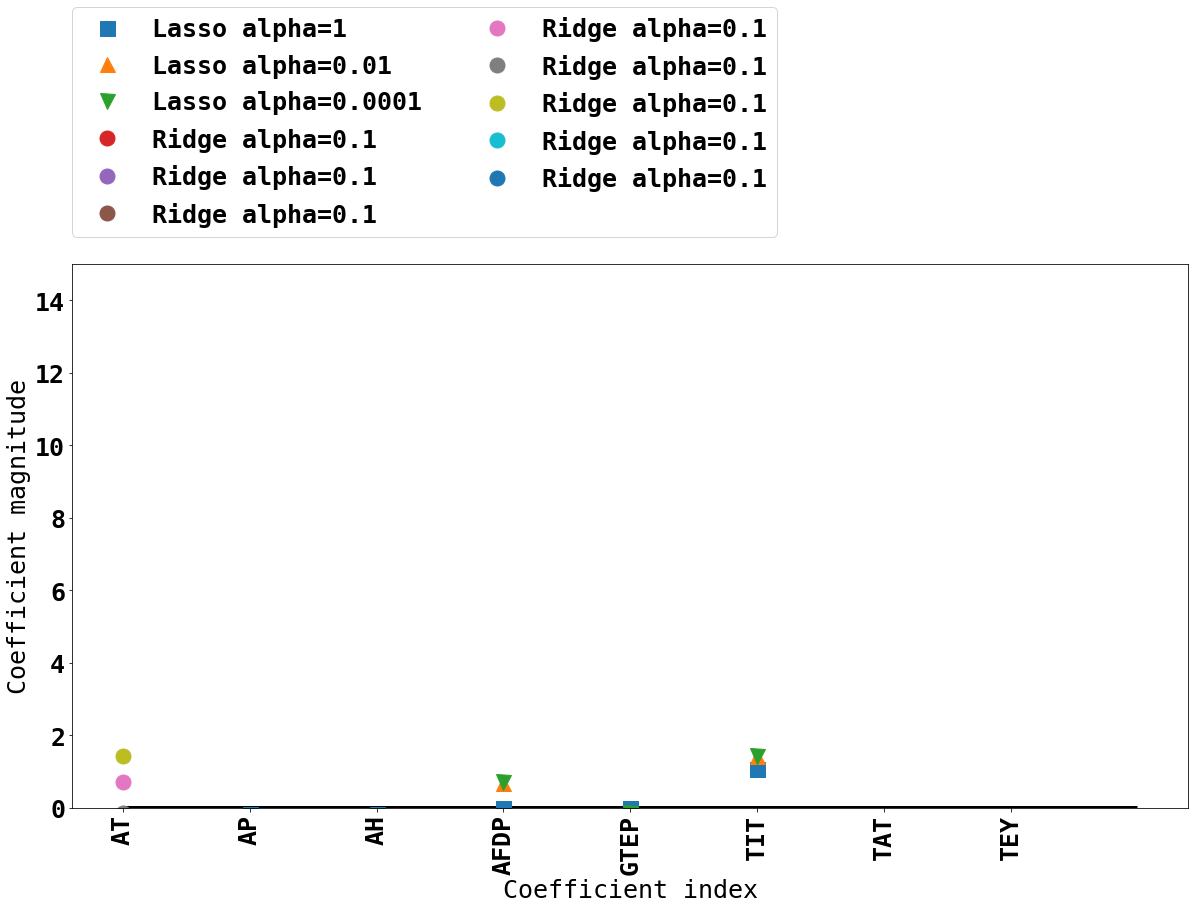

In [26]:
plot_lasso_vs_ridge()

   ## QUESTION 4 : In the fused file, add a new column for the year, and assign an integer value to each file, e.g. for file gt_2011.csv  → 0, gt_2012.csv  → 1 and so on. 
   ## Fit one multiclass classification model to predict the year as a function of the data. Report accuracy on the test set. Perform a manual optimization to improve your results.

In [27]:
df_list = [data,df_2012,df_2013,df_2014,df_2015]
y = 0

for i in df_list:
    i['Year']=y
    y += 1

df_cls = pd.concat([data,df_2012,df_2013,df_2014,df_2015])
df_cls


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,0
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,0
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,0
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,0
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7379,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172,4
7380,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849,4
7381,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147,4
7382,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738,4


In [28]:
Label = df_cls['Year']

y_mul = df_cls.iloc[:,-1].values  # multiclass classfication

In [29]:
y_mul.shape

(36733,)

In [30]:
X_mul = df_cls.iloc[:,:11].values
X_mul.shape

(36733, 11)

In [31]:
# y_mul_new = y_mul.reshape(y_mul.shape[:1])
# y_mul_new = y_mul.transpose()

# # y_mul_new = y_mul.ravel() 
# # # print("New resulting array: ", y_mul_new)
# # y_mul_new.shape

In [32]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_mul,y_mul).predict(X_mul)

print("Number of mislabeled points out of a total {} points : {}".format(X_mul.shape[0],(y_mul != y_pred).sum()))

Number of mislabeled points out of a total 36733 points : 21808


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_mul, y_mul, random_state=42)

gnb_fit = gnb.fit(X_train, y_train)
print("Training set score: {:.3f}".format(gnb_fit.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gnb_fit.score(X_test, y_test)))

Training set score: 0.403
Test set score: 0.399


   ## QUESTION 5 : For the dataset of the previous question, fit two different multiclass classification models. Compare their performance on the test set in terms of accuracy and runtime. Using your best result, plot the feature importance.

In [34]:
y_cls = df_cls.iloc[:,-1].values
y_cls.shape

(36733,)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_mul, y_cls, random_state=42)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [37]:
KNeighborsClassifier?

In [38]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.68


In [39]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to any number
neighbors_settings = list(range(1, 20))
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

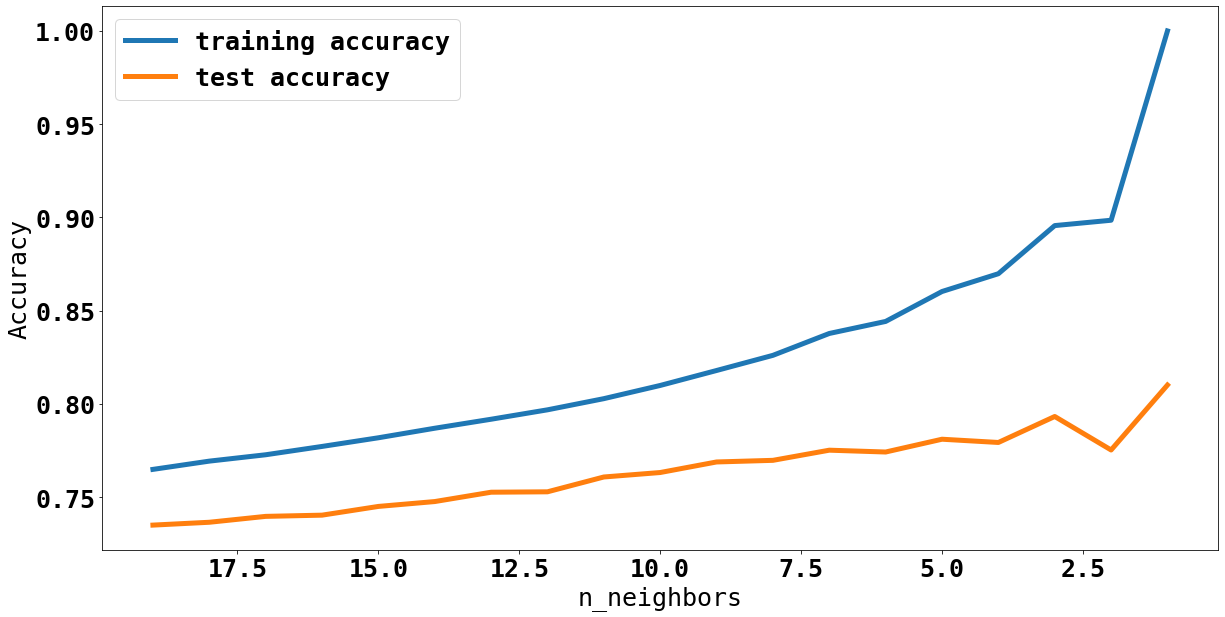

In [41]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.gca().invert_xaxis()
plt.legend()

In [66]:
import time
start = time.time()

from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X_mul,y_cls, random_state=42)

gbrt1 = GradientBoostingRegressor(random_state=0)
gbrt1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt1.score(X_test, y_test)))
end = time.time()
print("computing time:", end - start, "seconds")

Accuracy on training set: 0.798
Accuracy on test set: 0.786
computing time: 9.146673917770386 seconds


In [70]:
mulnames = list(df_cls.columns)
Xmul_names = mulnames[:9]

def plot_feature_importances(model):
    n_features = X_mul.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xmul_names)
    plt.title('Feature importance')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [59]:
# gbrt = GradientBoostingRegressor(random_state=0, max_depth=4)
# gbrt.fit(X_train, y_train)
# print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [63]:
# import matplotlib as mpl
# mpl.rcParams['figure.figsize'] = (16, 6)

In [64]:
# gbrt = GradientBoostingRegressor(random_state=0, max_depth=1)
# gbrt.fit(X_train, y_train)

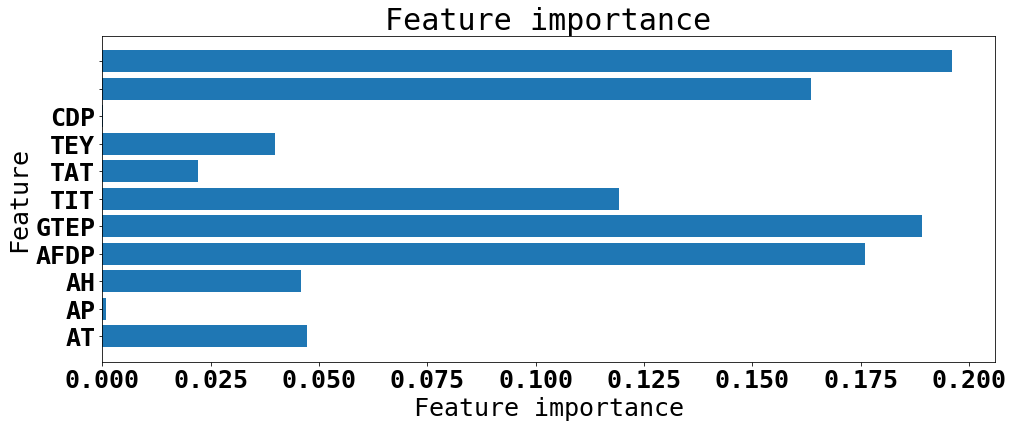

In [71]:
plot_feature_importances(gbrt1)